<a href="https://colab.research.google.com/github/emirhanbaran0/ADVANTURE_GAME_ON_CONSOL_WITH_JAVA/blob/main/TierPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_excel("/content/tier_prediction/express_january_cost_table.xlsx", skiprows=14)

In [18]:
new_column_names = {
    'Unnamed: 0' : 'code',
    'Unnamed: 1' : 'season',
    'Unnamed: 2' : 'figure',
    'Unnamed: 3' : 'dimension',
    'Unnamed: 4' : 'price',
    'Unnamed: 5' : 'bill_price_without_kdv',
    'Unnamed: 6' : 'bill_price_with_kdv',
    'Unnamed: 8' : 'bottom_cost_without_kdv',
    'Unnamed: 9' : 'bottom_cost_with_kdv'

}

df = df.drop('Unnamed: 7', axis = 1)
df = df.rename(columns=new_column_names)


In [19]:
df.head(5)

,code,season,figure,dimension,price,bill_price_without_kdv,bill_price_with_kdv,bottom_cost_without_kdv,bottom_cost_with_kdv
0,854398,YAZ,PRIMACY 4,165/65 R15 81T TL PRIMACY 4 SELFSEAL S1 MI,6340,6340,7608.0,6340,7608.0
1,14878,YAZ,PRIMACY 4,165/65 R15 81T TL PRIMACY 4 MI,4976,4976,5971.2,4976,5971.2
2,282908,YAZ,PRIMACY 4,165/65 R15 81T TL PRIMACY 4 S1 MI,4976,4976,5971.2,4976,5971.2
3,684057,YAZ,ENERGY SAVER+,165/70 R14 81T TL ENERGY SAVER+ GRNX MI,4412,4412,5294.4,4412,5294.4
4,195506,YAZ,PRIMACY 4,175/65 R15 84H TL PRIMACY 4 MI,4628,4628,5553.6,4628,5553.6


In [7]:
df2 = pd.read_excel("/content/tier_prediction/dataframe_final.xlsx")

In [20]:
df['code'] = pd.to_numeric(df['code'],errors = 'coerce')
df2['kod'] = pd.to_numeric(df2['kod'], errors= 'coerce')

common_codes = set(df['code']).intersection(set(df2['kod']))

print(f"There are {len(common_codes)} common codes in given dataframes.")

There are 1814 common codes in given dataframes.


In [21]:
common_codes_df = pd.DataFrame(list(common_codes), columns=['code'])



In [22]:
common_codes_df.head(5)

,code
0,253958
1,524294
2,401417
3,958489
4,294941


In [24]:
df2_filtered = df2[df2['kod'].isin(common_codes_df['code'])]

df2_filtered.head(5)

,inc,kod,ebat,yuk/hiz,desen,liste_kdv_haric,liste_kdv_dahil,Fatura alti,mevsim,Maliyet_kdv _haric,Maliyet_kdv_dahil,Servis kampanyasi,Dip_kdvdahil_maliyet2023
0,"14""",966009,185/60R14TL,82 H,ENERGY SAVER+ GRNX,2131,2514.58,1363.84,1,1363.84,1609.3312,0.0,1609.3312
1,"14""",771116,175/65R14TL,82 T,ENERGY SAVER + GRNX,1938,2286.84,1240.32,1,1240.32,1463.5776,0.0,1463.5776
2,"14""",841581,185/65R14TL,86 T,ENERGY SAVER + GRNX,2278,2688.04,1457.92,1,1457.92,1720.3456,0.0,1720.3456
3,"14""",342431,185/65R14TL,86 H,ENERGY SAVER + GRNX,2526,2980.68,1616.64,1,1616.64,1907.6352,0.0,1907.6352
4,"14""",684057,165/70R14TL,81 T,ENERGY SAVER + GRNX,2096,2473.28,1341.44,1,1341.44,1582.8992,0.0,1582.8992


In [27]:
df2_filtered = df2_filtered.merge(
    df[['code', 'bottom_cost_with_kdv']],
    left_on='kod',
    right_on='code',
    how='left'
)

In [31]:
df2_filtered = df2_filtered.drop('code', axis=1)
df2_filtered.head(5)


,inc,kod,ebat,yuk/hiz,desen,liste_kdv_haric,liste_kdv_dahil,Fatura alti,mevsim,Maliyet_kdv _haric,Maliyet_kdv_dahil,Servis kampanyasi,Dip_kdvdahil_maliyet2023,bottom_cost_with_kdv
0,"14""",966009,185/60R14TL,82 H,ENERGY SAVER+ GRNX,2131,2514.58,1363.84,1,1363.84,1609.3312,0.0,1609.3312,5304.0
1,"14""",771116,175/65R14TL,82 T,ENERGY SAVER + GRNX,1938,2286.84,1240.32,1,1240.32,1463.5776,0.0,1463.5776,4905.6
2,"14""",841581,185/65R14TL,86 T,ENERGY SAVER + GRNX,2278,2688.04,1457.92,1,1457.92,1720.3456,0.0,1720.3456,5452.8
3,"14""",342431,185/65R14TL,86 H,ENERGY SAVER + GRNX,2526,2980.68,1616.64,1,1616.64,1907.6352,0.0,1907.6352,6048.0
4,"14""",684057,165/70R14TL,81 T,ENERGY SAVER + GRNX,2096,2473.28,1341.44,1,1341.44,1582.8992,0.0,1582.8992,5294.4


In [32]:
# Calculating the figure frequency of the season 1 tiers
season_1_tiers = df2[df2['mevsim'] == 1]['desen'].value_counts().head()

In [33]:
print("Most common tier figures for summer:")
print("-------------------------------------")
print(season_1_tiers)
print("-------------------------------------")

Most common tier figures for summer:
-------------------------------------
desen
PRIMACY 4+ MI        118
CROSSCLIMATE 2 MI     83
PILOT SPORT 4 S       75
PILOT SPORT 5 MI      47
PILOT SPORT 4 SUV     39
Name: count, dtype: int64
-------------------------------------


In [34]:
season_0_figures = df2[df2['mevsim'] == 0]['desen'].value_counts().head()

In [36]:
season_0_cost = df2[df2['mevsim'] == 0 ].groupby('desen')['Maliyet_kdv_dahil'].mean()
season_0_cost = season_0_cost[season_0_figures.index]

In [41]:
print("Most common 5 tier figures for winter and their avarage cost:")
print("-------------------------------------")
print(pd.DataFrame( {
    'Figure Frequency' : season_0_figures,
    'Avarage Cost' : season_0_cost.round(2)
}))
print("-------------------------------------")

Most common 5 tier figures for winter and their avarage cost:
-------------------------------------
                      Figure Frequency  Avarage Cost
desen                                               
ALPIN 6                             56       2706.50
PILOT ALPIN 5 SUV MI                47       6784.75
PILOT ALPIN PA4 GRNX                26       6646.57
PILOT ALPIN 5                       25       4080.13
PILOT ALPIN 5 MI                    20       5811.11
-------------------------------------


In [38]:
season_1_figures = df2[df2['mevsim'] == 1].groupby('desen')['Maliyet_kdv_dahil'].mean()
season_1_figures = season_1_figures[season_1_tiers.index]

In [42]:
print("Most common 5 tier figures for summer and their avarage cost:")
print("-------------------------------------")
print(pd.DataFrame( {
    'Figure Frequency' : season_1_tiers,
    'Avarage Cost ' : season_1_figures.round(2)
}))
print("-------------------------------------")

Most common 5 tier figures for summer and their avarage cost:
-------------------------------------
                   Figure Frequency  Avarage Cost 
desen                                             
PRIMACY 4+ MI                   118        2954.02
CROSSCLIMATE 2 MI                83        3198.54
PILOT SPORT 4 S                  75        6335.48
PILOT SPORT 5 MI                 47        3730.16
PILOT SPORT 4 SUV                39        5087.32
-------------------------------------


In [44]:
summer_tiers_df = pd.DataFrame({
    'Frequency' : season_1_tiers,
    'Avarage Cost' : season_1_figures.round(2)
})
print(summer_tiers_df)

                   Frequency  Avarage Cost
desen                                     
PRIMACY 4+ MI            118       2954.02
CROSSCLIMATE 2 MI         83       3198.54
PILOT SPORT 4 S           75       6335.48
PILOT SPORT 5 MI          47       3730.16
PILOT SPORT 4 SUV         39       5087.32


In [46]:
winter_tiers_df = pd.DataFrame({
    'Frequency' : season_0_figures,
    'Avarage Cost' : season_0_cost.round(2)
})
print(winter_tiers_df)

                      Frequency  Avarage Cost
desen                                        
ALPIN 6                      56       2706.50
PILOT ALPIN 5 SUV MI         47       6784.75
PILOT ALPIN PA4 GRNX         26       6646.57
PILOT ALPIN 5                25       4080.13
PILOT ALPIN 5 MI             20       5811.11


In [47]:
# Calcualting avarage cost of summer and winter tiers together
avarage_cost_df = pd.concat({
    'Summer' : summer_tiers_df['Avarage Cost'],
    'Winter' : winter_tiers_df['Avarage Cost']
})

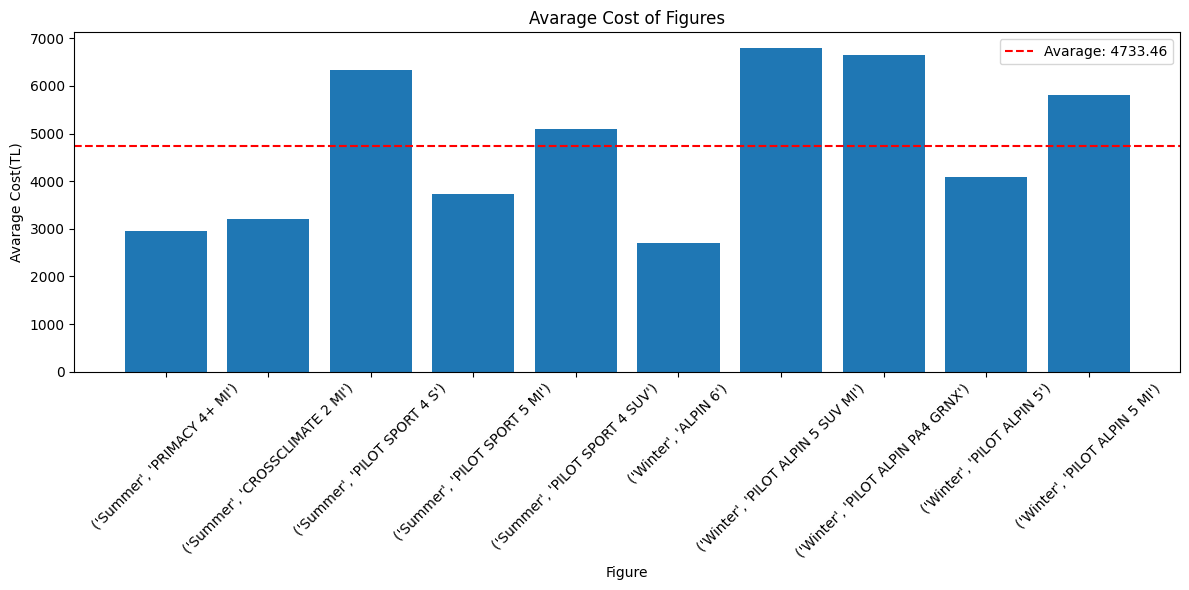

In [54]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(avarage_cost_df)), avarage_cost_df.values)

plt.xlabel('Figure')
plt.ylabel('Avarage Cost(TL)')
plt.title('Avarage Cost of Figures')
plt.xticks(range(len(avarage_cost_df)), avarage_cost_df.index, rotation = 45)

avarage = avarage_cost_df.mean()
plt.axhline(y=avarage, color='r', linestyle='--', label=f'Avarage: {avarage:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

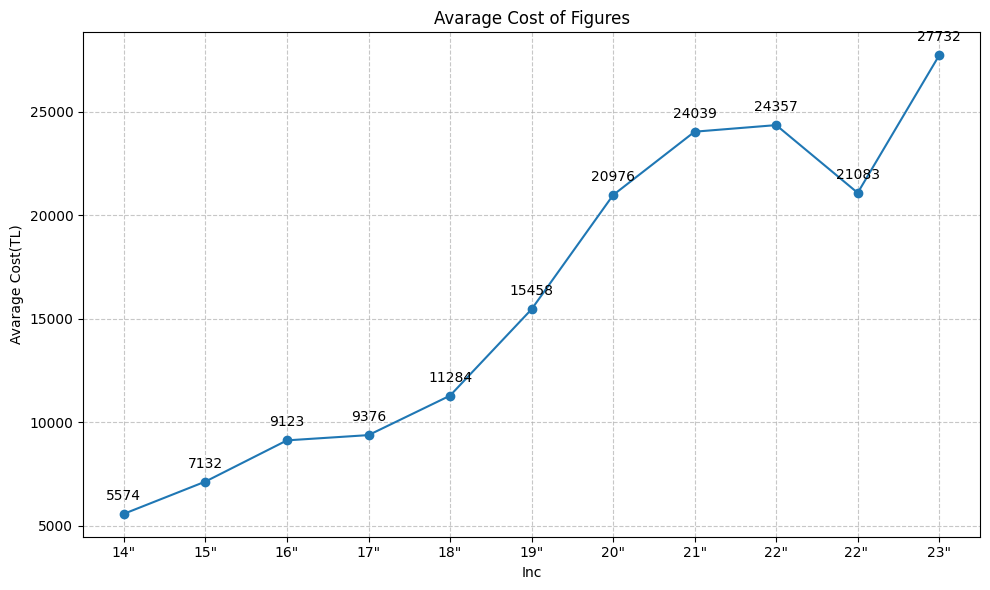

In [58]:
inc_cost_2024 = df2_filtered.groupby('inc')['bottom_cost_with_kdv'].mean()

plt.figure(figsize=(10, 6))
plt.plot(inc_cost_2024.index, inc_cost_2024.values, marker='o', linestyle='-')
plt.xlabel('Inc')
plt.ylabel('Avarage Cost(TL)')
plt.title('Avarage Cost of Figures')


plt.grid(True, linestyle='--', alpha=0.7)

for x,y in zip(inc_cost_2024.index, inc_cost_2024.values):
  plt.annotate(f'{y:.0f}',
               (x,y),
               textcoords= "offset points",
               xytext = (0,10),
               ha = 'center')
plt.tight_layout()
plt.show()


In [69]:
cost_increase = df2_filtered[['Dip_kdvdahil_maliyet2023', 'bottom_cost_with_kdv']].mean()
increase_rate = (cost_increase['bottom_cost_with_kdv'] - cost_increase['Dip_kdvdahil_maliyet2023']) / cost_increase['Dip_kdvdahil_maliyet2023'] * 100


print(f"Cost Increase Rate From 2023 to 2024: {increase_rate:.2f}%")

Cost Increase Rate From 2023 to 2024: 218.09%


In [70]:
cost_increase_groupedby_seasons = df2_filtered.groupby('mevsim')[['Dip_kdvdahil_maliyet2023', 'bottom_cost_with_kdv']].mean()
increase_rate_groupedby_seasons = (cost_increase_groupedby_seasons['bottom_cost_with_kdv'] - cost_increase_groupedby_seasons['Dip_kdvdahil_maliyet2023']) / cost_increase_groupedby_seasons['Dip_kdvdahil_maliyet2023'] * 100
print(increase_rate_groupedby_seasons)

mevsim
0    225.111267
1    216.090832
dtype: float64


In [65]:
df2_filtered = df2_filtered.drop(['yuk/hiz', 'desen', 'liste_kdv_haric', 'liste_kdv_dahil', 'Fatura alti', 'Maliyet_kdv _haric', 'Maliyet_kdv_dahil', 'Servis kampanyasi'], axis = 1)
df2_filtered['inc'] = df2_filtered['inc'].str.replace('"','').astype(float)
df2_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1814 entries, 0 to 1813
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   inc                       1814 non-null   float64
 1   kod                       1814 non-null   int64  
 2   ebat                      1814 non-null   object 
 3   mevsim                    1814 non-null   int64  
 4   Dip_kdvdahil_maliyet2023  1814 non-null   float64
 5   bottom_cost_with_kdv      1814 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 85.2+ KB


In [71]:
df2_filtered.head(5)

,inc,kod,ebat,mevsim,Dip_kdvdahil_maliyet2023,bottom_cost_with_kdv
0,14.0,966009,185/60R14TL,1,1609.3312,5304.0
1,14.0,771116,175/65R14TL,1,1463.5776,4905.6
2,14.0,841581,185/65R14TL,1,1720.3456,5452.8
3,14.0,342431,185/65R14TL,1,1907.6352,6048.0
4,14.0,684057,165/70R14TL,1,1582.8992,5294.4


In [72]:
# Ebat sütununu genişlik ve yanak olarak ayırma
df2_filtered['genislik'] = df2_filtered['ebat'].str.extract(r'(\d{3})').iloc[:,0]
df2_filtered['yanak'] = df2_filtered['ebat'].str.extract(r'\d{3}[\s/]?(\d{2})').iloc[:,0]

# Yeni sütunları sayısal değere çevirme
df2_filtered['genislik'] = pd.to_numeric(df2_filtered['genislik'], errors='coerce')
df2_filtered['yanak'] = pd.to_numeric(df2_filtered['yanak'], errors='coerce')

# Ebat sütununu silme
df2_filtered = df2_filtered.drop('ebat', axis=1)
df2_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1814 entries, 0 to 1813
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   inc                       1814 non-null   float64
 1   kod                       1814 non-null   int64  
 2   mevsim                    1814 non-null   int64  
 3   Dip_kdvdahil_maliyet2023  1814 non-null   float64
 4   bottom_cost_with_kdv      1814 non-null   float64
 5   genislik                  1812 non-null   float64
 6   yanak                     1812 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 99.3 KB


In [74]:
df2_filtered = df2_filtered.dropna()

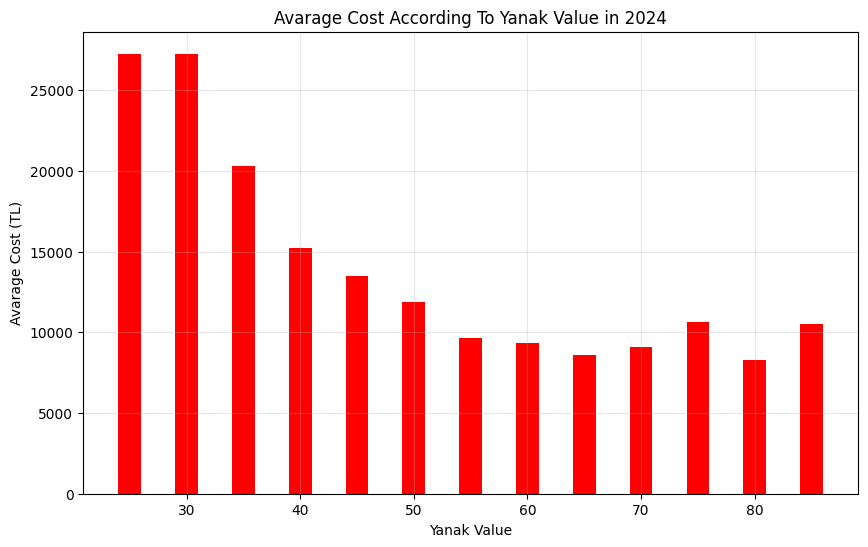

In [89]:
yanak_cost_2024 = df2_filtered.groupby('yanak')['bottom_cost_with_kdv'].mean()

plt.figure(figsize=(10, 6))
plt.bar(yanak_cost_2024.index, yanak_cost_2024.values, width= 2 , color ='red')
plt.title('Avarage Cost According To Yanak Value in 2024')
plt.xlabel('Yanak Value')
plt.ylabel('Avarage Cost (TL)')


plt.grid(True, alpha=0.3)
plt.show()


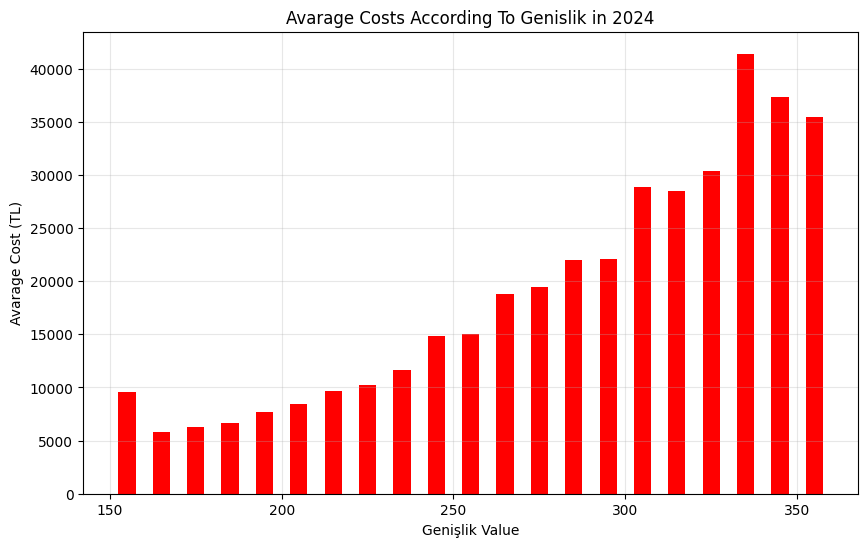

In [85]:
genislik_cost_2024 = df2_filtered.groupby('genislik')['bottom_cost_with_kdv'].mean()

plt.figure(figsize=(10, 6))
plt.bar(genislik_cost_2024.index, genislik_cost_2024.values, width=5, color='red')
plt.title('Avarage Costs According To Genislik in 2024')
plt.xlabel('Genişlik Value')
plt.ylabel('Avarage Cost (TL)')

plt.grid(True, alpha=0.3)
plt.show()

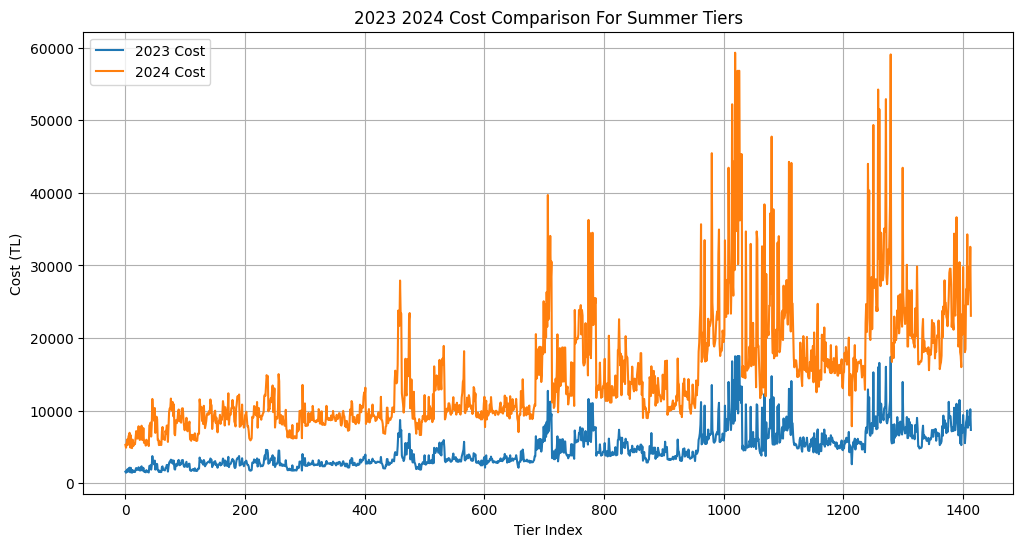

In [90]:
season_1_tiers = df2_filtered[df2_filtered['mevsim'] == 1]

# 2023 2024 Cost Comparison Graph
plt.figure(figsize=(12, 6))
plt.plot(season_1_tiers.index, season_1_tiers['Dip_kdvdahil_maliyet2023'], label='2023 Cost')
plt.plot(season_1_tiers.index, season_1_tiers['bottom_cost_with_kdv'], label='2024 Cost')
plt.xlabel('Tier Index')
plt.ylabel('Cost (TL)')
plt.title('2023 2024 Cost Comparison For Summer Tiers')
plt.legend()
plt.grid(True)
plt.show()

In [91]:
# Defining Constant USD Currency Values for 2023, 2024 and 2025
USD_2023 = 18.71  # 2023 January
USD_2024 = 29.92  # 2024 January
USD_2025 = 35.00  # 2025 January

# Kurları yazdırma
print(f"2023 January Dolar Currency Value: {USD_2023:.2f} TL")
print(f"2024 January Dolar Currency Value: {USD_2024:.2f} TL")
print(f"2025 January Dolar Currency Value: {USD_2025:.2f} TL")

2023 January Dolar Currency Value: 18.71 TL
2024 January Dolar Currency Value: 29.92 TL
2025 January Dolar Currency Value: 35.00 TL



Model Performance Metrics:
MSE: 787.24
R-kare (R²) Score: 0.99

Model Coefficients:
Genişlik: 0.1770
Yanak: -0.2579
Maliyet 2023: -10.8103
inc: -15.7704
mevsim: 2.0107
Constant (Intercept): 174.5347


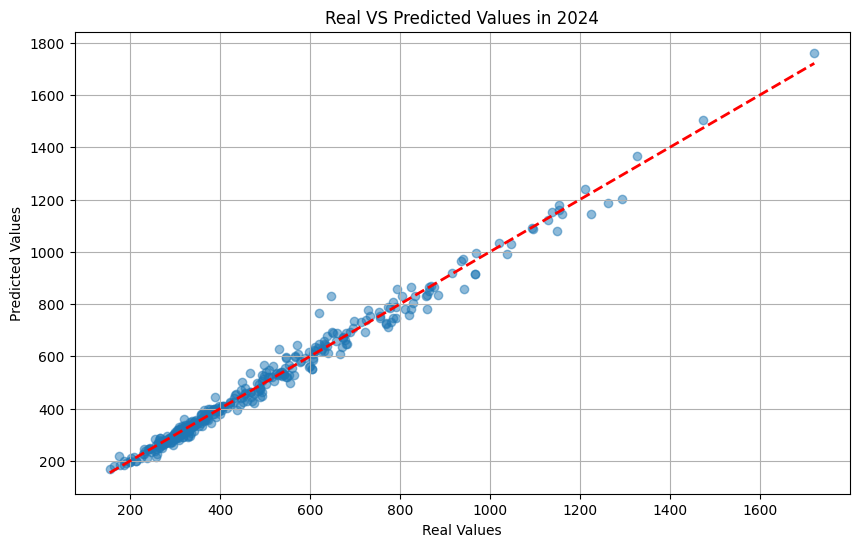

In [93]:
#Cost Calculations based on usd currency

df2_filtered['maliyet_dolar_2023'] = df2_filtered['Dip_kdvdahil_maliyet2023'] / USD_2023
df2_filtered['maliyet_dolar_2024'] = df2_filtered['bottom_cost_with_kdv'] / USD_2024

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


x = df2_filtered[ ['genislik', 'yanak', 'inc', 'mevsim', 'maliyet_dolar_2023']]
y = df2_filtered['maliyet_dolar_2024'] # Target Variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("\nModel Performance Metrics:")
print(f"MSE: {mse:.2f}")
print(f"R-kare (R²) Score: {r2:.2f}")


print("\nModel Coefficients:")
for feature, coef in zip(['Genişlik', 'Yanak', 'Maliyet 2023','inc','mevsim'], model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Constant (Intercept): {model.intercept_:.4f}")


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real VS Predicted Values in 2024')
plt.grid(True)
plt.show()


Polynomial Regression Model Performance Metrics:
MSE: 736.64
R-Square (R²) Score: 0.99


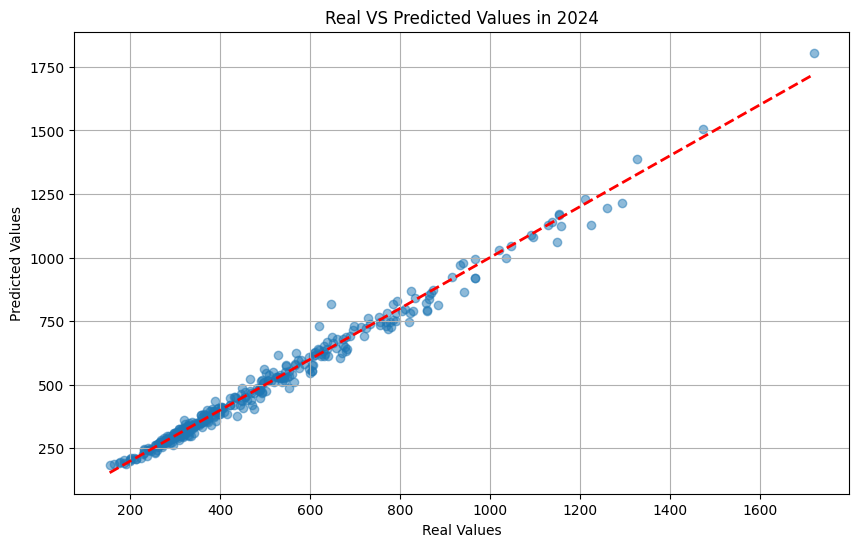

In [94]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)

poly_model = LinearRegression()
poly_model.fit(x_poly_train, y_train)

y_pred_poly = poly_model.predict(x_poly_test)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("\nPolynomial Regression Model Performance Metrics:")
print(f"MSE: {mse_poly:.2f}")
print(f"R-Square (R²) Score: {r2_poly:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial Regression Model Real VS Predicted Values in 2024')
plt.grid(True)
plt.show()


Random Forest Regression Model Performance Metrics:
MSE: 846.55
R-Square (R²) Score: 0.99


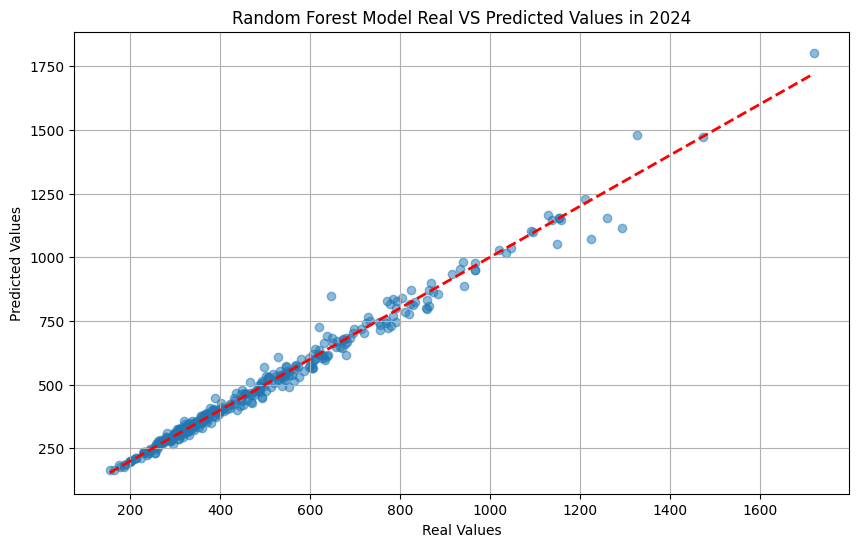

In [97]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regression Model Performance Metrics:")
print(f"MSE: {mse_rf:.2f}")
print(f"R-Square (R²) Score: {r2_rf:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Model Real VS Predicted Values in 2024')
plt.grid(True)
plt.show()